In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Product_Reviews.csv')

print("Dataset Info:")
print(dataset.info())
print("\nFirst 5 rows:")
print(dataset.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      1007 non-null   object
 1   Product Review  1007 non-null   object
 2   Sentiment       1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB
None

First 5 rows:
             Product ID                                     Product Review  \
0  AVpe7AsMilAPnD_xQ78G  I initially had trouble deciding between the p...   
1  AVpe7AsMilAPnD_xQ78G  Allow me to preface this with a little history...   
2  AVpe7AsMilAPnD_xQ78G  I am enjoying it so far. Great for reading. Ha...   
3  AVpe7AsMilAPnD_xQ78G  I bought one of the first Paperwhites and have...   
4  AVpe7AsMilAPnD_xQ78G  I have to say upfront - I don't like coroporat...   

  Sentiment  
0  POSITIVE  
1  POSITIVE  
2  POSITIVE  
3  POSITIVE  
4  POSITIVE  


In [4]:

sentiment_counts = dataset['Sentiment'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)

dataset['Review_Length'] = dataset['Product Review'].apply(len)

print("\nReview length statistics:")
print(dataset['Review_Length'].describe())


Sentiment distribution:
Sentiment
POSITIVE    852
NEUTRAL      81
NEGATIVE     74
Name: count, dtype: int64

Review length statistics:
count     1007.000000
mean       598.321748
std       1331.094765
min          3.000000
25%        100.000000
50%        217.000000
75%        613.500000
max      19739.000000
Name: Review_Length, dtype: float64


1.Remove special characters
2.Lowercasing
3. Remove extra white space
4. Remove stop words
5. Stemming and Lemmatization

In [5]:
duplicate_rows = dataset[dataset.duplicated()]
print("Duplicate rows:\n", duplicate_rows)
print("\nNumber of duplicate rows:", duplicate_rows.shape[0])

Duplicate rows:
                Product ID Product Review Sentiment  Review_Length
191  AVpfLiCSilAPnD_xWpk_      Read more  POSITIVE              9
391  AVpe7LD5LJeJML43ybWA      Read more  POSITIVE              9

Number of duplicate rows: 2


In [6]:
df = dataset.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)


Shape after removing duplicates: (1005, 4)


In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())

df = df.dropna()


Missing values per column:
Product ID        0
Product Review    0
Sentiment         0
Review_Length     0
dtype: int64


In [8]:

sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)

df['Review_Length'] = df['Product Review'].apply(len)

print("\nReview length statistics:")
print(df['Review_Length'].describe())


Sentiment distribution:
Sentiment
POSITIVE    850
NEUTRAL      81
NEGATIVE     74
Name: count, dtype: int64

Review length statistics:
count     1005.000000
mean       599.494527
std       1332.159740
min          3.000000
25%        100.000000
50%        217.000000
75%        618.000000
max      19739.000000
Name: Review_Length, dtype: float64


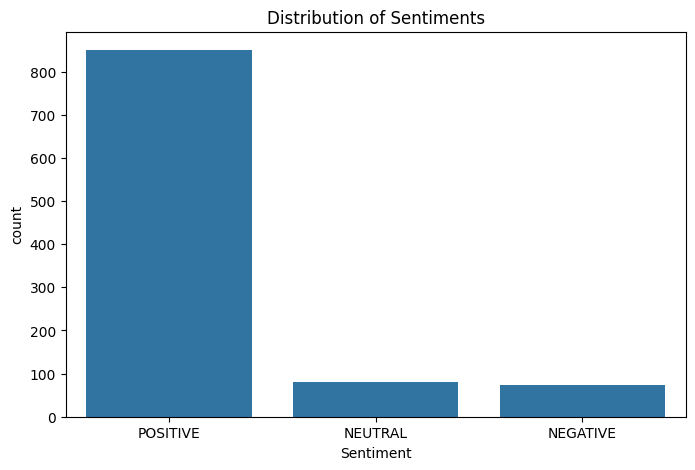

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
plt.title('Distribution of Sentiments')
plt.show()

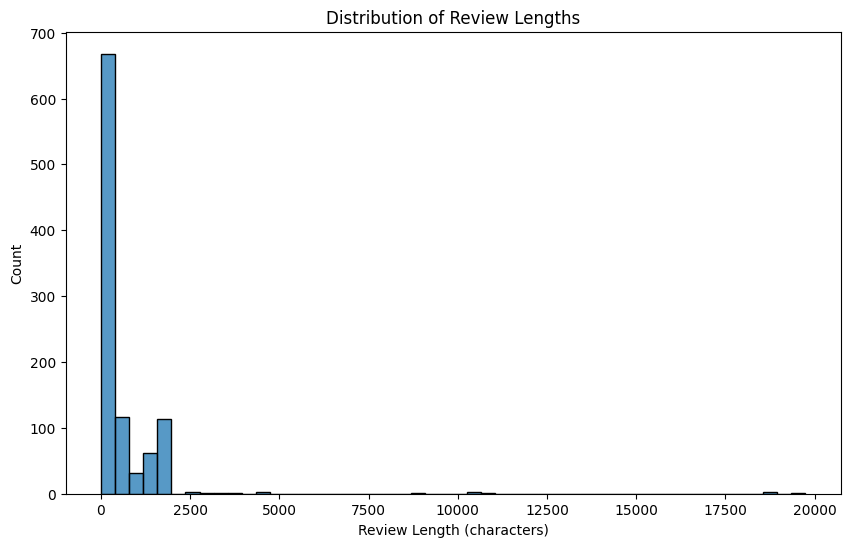

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Review_Length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.show()

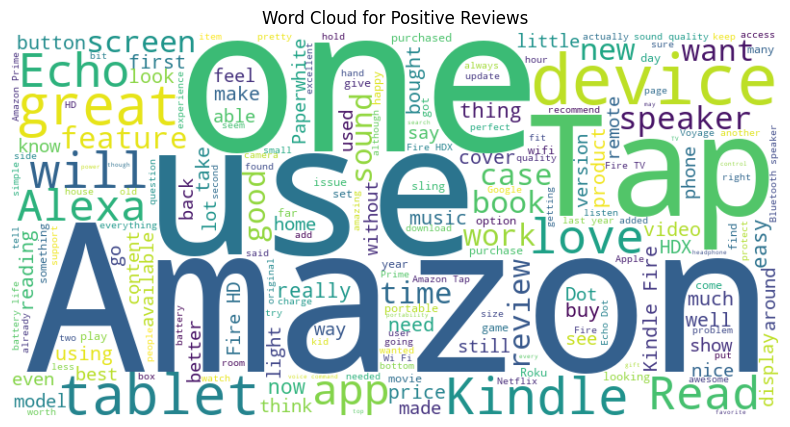

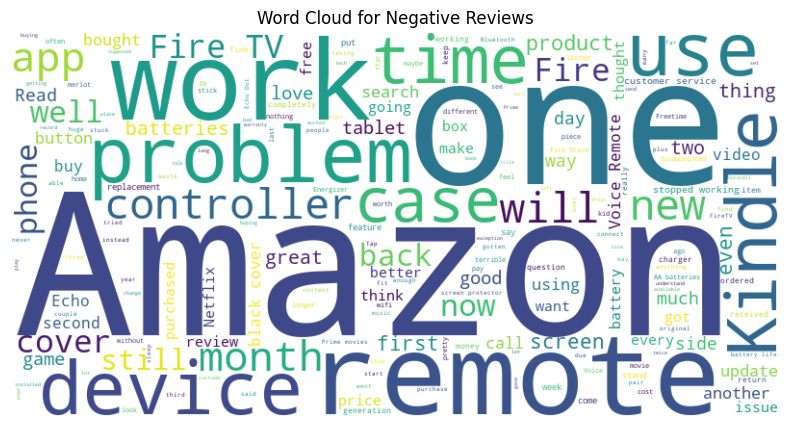

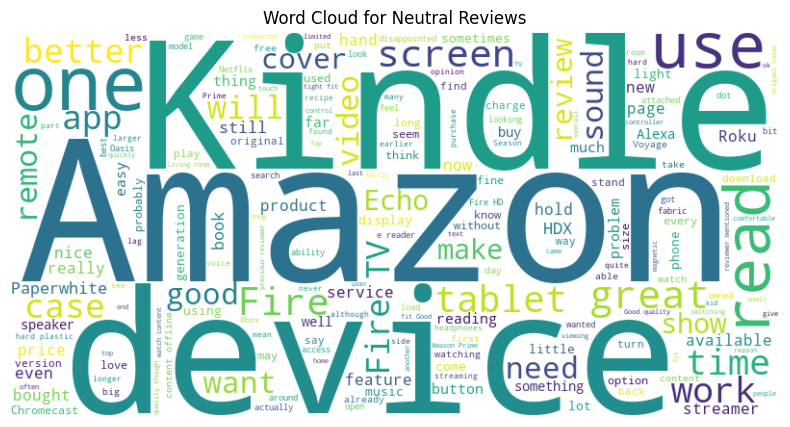

In [11]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

positive_text = ' '.join(df[df['Sentiment'] == 'POSITIVE']['Product Review'])
generate_wordcloud(positive_text, 'Word Cloud for Positive Reviews')

negative_text = ' '.join(df[df['Sentiment'] == 'NEGATIVE']['Product Review'])
generate_wordcloud(negative_text, 'Word Cloud for Negative Reviews')

neutral_text = ' '.join(df[df['Sentiment'] == 'NEUTRAL']['Product Review'])
generate_wordcloud(neutral_text, 'Word Cloud for Neutral Reviews')


Top 5 products by number of reviews:
Product ID
AVpfpK8KLJeJML43BCuD    542
AVpfLiCSilAPnD_xWpk_     35
AVzRloqLGV-KLJ3aavBd     27
AVzRkFTFvKc47QAVd43-     18
AVsRjfwAU2_QcyX9PHqe     17
Name: count, dtype: int64


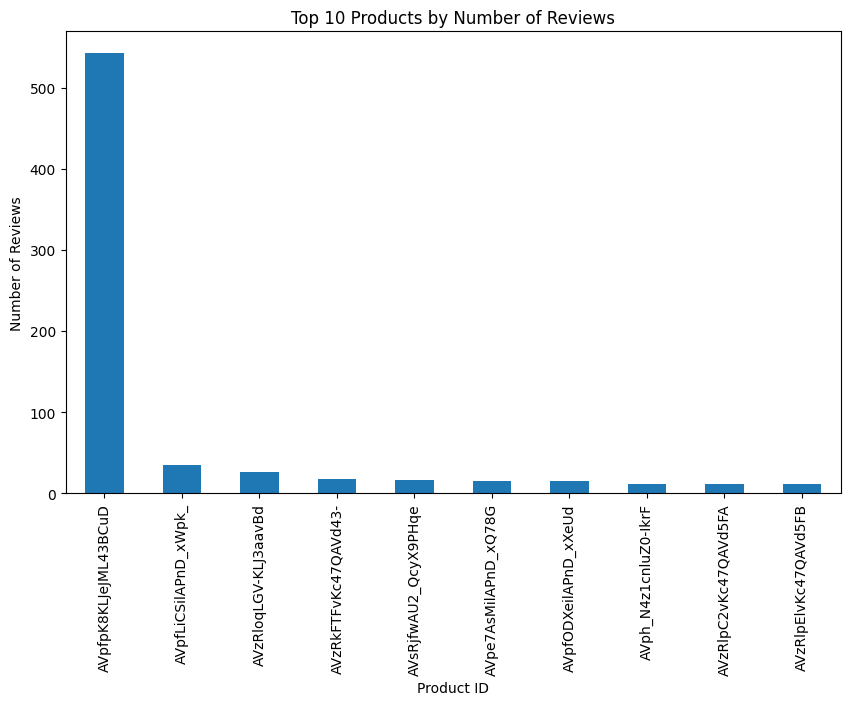

In [12]:
product_review_counts = df['Product ID'].value_counts()
print("\nTop 5 products by number of reviews:")
print(product_review_counts.head())

plt.figure(figsize=(10, 6))
product_review_counts.head(10).plot(kind='bar')
plt.title('Top 10 Products by Number of Reviews')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()


Sentiment distribution for product AVpfpK8KLJeJML43BCuD:
Sentiment
POSITIVE    497
NEUTRAL      28
NEGATIVE     17
Name: count, dtype: int64


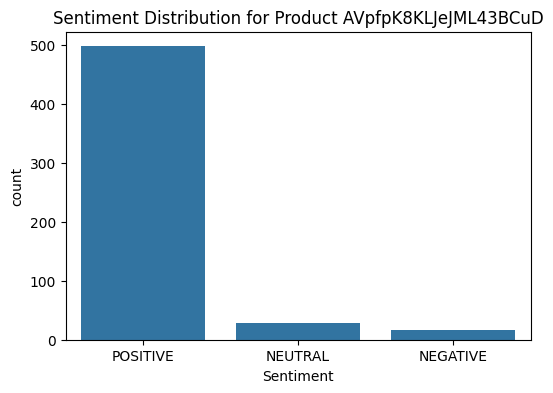


Sentiment distribution for product AVpfLiCSilAPnD_xWpk_:
Sentiment
POSITIVE    28
NEGATIVE     6
NEUTRAL      1
Name: count, dtype: int64


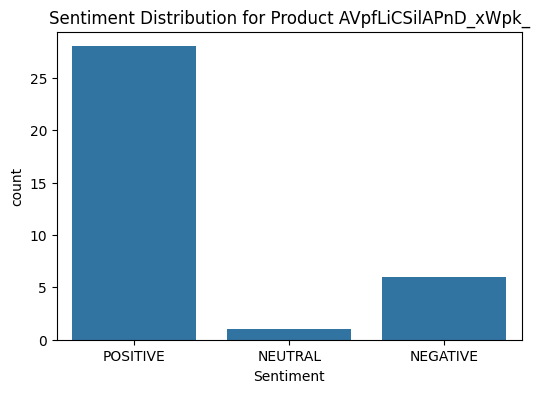


Sentiment distribution for product AVzRloqLGV-KLJ3aavBd:
Sentiment
POSITIVE    18
NEGATIVE     7
NEUTRAL      2
Name: count, dtype: int64


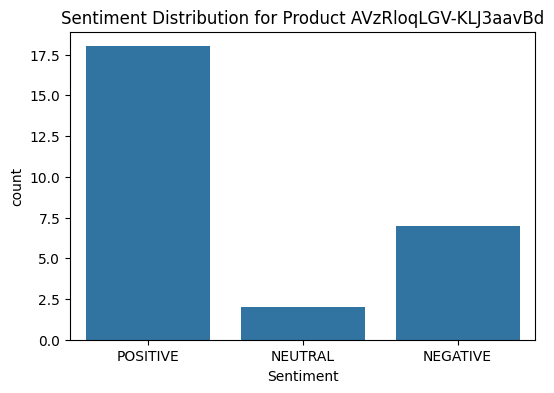

In [13]:

products_with_multiple_reviews = product_review_counts[product_review_counts >= 5].index

for product in products_with_multiple_reviews[:3]:  # Just show first 3 for brevity
    product_df = df[df['Product ID'] == product]
    print(f"\nSentiment distribution for product {product}:")
    print(product_df['Sentiment'].value_counts())
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Sentiment', data=product_df, order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
    plt.title(f'Sentiment Distribution for Product {product}')
    plt.show()

In [14]:
import re
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

In [15]:
positive_text = positive_text.lower()

In [16]:
positive_text = ' '.join(positive_text.split())

In [17]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
positive_text_nostop = ' '.join([word for word in positive_text.split() if word not in stop_words])
print(positive_text_nostop[:500]) 

initially trouble deciding paperwhite voyage reviews less said thing: paperwhite great, spending money, go voyage.fortunately, friends owned each, ended buying paperwhite basis: models 300 ppi, 80 dollar jump turns pricey voyage's page press always sensitive, fine specific setting, need auto light adjustment).it's week loving paperwhite, regrets! touch screen receptive easy use, keep light specific setting regardless time day. (in case, hard change setting either, changing light level certain ti


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stemming/Lemmatization/ POS(Part of Speech)

In [18]:
#Stemming running->run,studies->studi, flies->fli
#Lemmatization running->run,studies->study, flies->fly
#porterstemmer() class
#wordnetlemmatizer() class
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

words = ['running', 'studies', 'flies']

nltk.download('wordnet')
print("Stemming:")
for word in words:
    print(f"{word} -> {stemmer.stem(word)}")

print("\nLemmatization:")
for word in words:
    print(f"{word} -> {lemmatizer.lemmatize(word, pos='v')}")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Stemming:
running -> run
studies -> studi
flies -> fli

Lemmatization:
running -> run
studies -> study
flies -> fly


* Stemming->When performance matters more than precision, Faster

* Lemmatization-> When linguistic correctness matters, slower

In [19]:
#Feature Extraction
#BOW
#TF-IDF (Term Frequency-Inverse Document Frequency)
#n-grams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
text=["This is text","Another text"]
vec = CountVectorizer()
bow_vectors = vec.fit_transform(text)
bow_vectors = bow_vectors.toarray()
bow_vectors = pd.DataFrame(bow_vectors, columns=vec.get_feature_names_out())
print(bow_vectors)

   another  is  text  this
0        0   1     1     1
1        1   0     1     0


In [20]:
tfidf_vec = TfidfVectorizer()
tfidf_vectors = tfidf_vec.fit_transform(text)
tfidf_vectors = tfidf_vectors.toarray()
tfidf_vectors = pd.DataFrame(tfidf_vectors, columns=tfidf_vec.get_feature_names_out())
print(tfidf_vectors)

    another        is      text      this
0  0.000000  0.631667  0.449436  0.631667
1  0.814802  0.000000  0.579739  0.000000


In [21]:
bigram_vec = CountVectorizer(ngram_range=(1, 2))
bigram_vectors = bigram_vec.fit_transform(text)
bigram_df = pd.DataFrame(bigram_vectors.toarray(), columns=bigram_vec.get_feature_names_out())
print(bigram_df)

   another  another text  is  is text  text  this  this is
0        0             0   1        1     1     1        1
1        1             1   0        0     1     0        0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X = product_df['Product Review']
y = product_df['Sentiment']

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42, stratify=y)

# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

# Model 2: Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Multinomial Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))

# Model 3: Linear SVM
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Linear SVM Results:")
print(classification_report(y_test, y_pred_svm))

# Model 4: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Results:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.00      0.00      0.00         1
    POSITIVE       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.22      0.33      0.27         9
weighted avg       0.44      0.67      0.53         9

Multinomial Naive Bayes Results:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.00      0.00      0.00         1
    POSITIVE       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.22      0.33      0.27         9
weighted avg       0.44      0.67      0.53         9

Linear SVM Results:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.00      0.00      0.00    

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Random Forest Results:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.00      0.00      0.00         1
    POSITIVE       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.22      0.33      0.27         9
weighted avg       0.44      0.67      0.53         9



C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [31]:
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"Multinomial Naive Bayes Accuracy: {acc_nb:.2f}")
print(f"Linear SVM Accuracy: {acc_svm:.2f}")

accuracies = {'Logistic Regression': acc_lr, 'Multinomial Naive Bayes': acc_nb, 'Linear SVM': acc_svm}
best_model_name = max(accuracies, key=accuracies.get)

print(f"\nBest model: {best_model_name}")

if best_model_name == 'Logistic Regression':
    accepted_model = lr
elif best_model_name == 'Multinomial Naive Bayes':
    accepted_model = nb
else:
    accepted_model = svm

print(f"Accepted model: {accepted_model}")

Logistic Regression Accuracy: 0.67
Multinomial Naive Bayes Accuracy: 0.67
Linear SVM Accuracy: 0.67

Best model: Logistic Regression
Accepted model: LogisticRegression(max_iter=1000)
